In [1]:
# Warmup 1: Go back to the code link for Monday's Lecture (lec 30)
# Take a look at the examples at the end of the lesson 
#     how to bucketize a DataFrame
#     how to apply a function to every element of a column
#     how to make a new column

# Wednesday, November 17
## Web 1 - How to get data from the 'Net

Core ideas: (thanks to instructor Alexi Brooks)
 - Network structure
     - IP addresses
     - host/domain names
     - client/server
     - request/response
 - HTTP protocol
     - URL
     - GET/POST
     - headers
     - status codes
 - The requests module
     - Etiquette
     - requests.get
     - requests.post

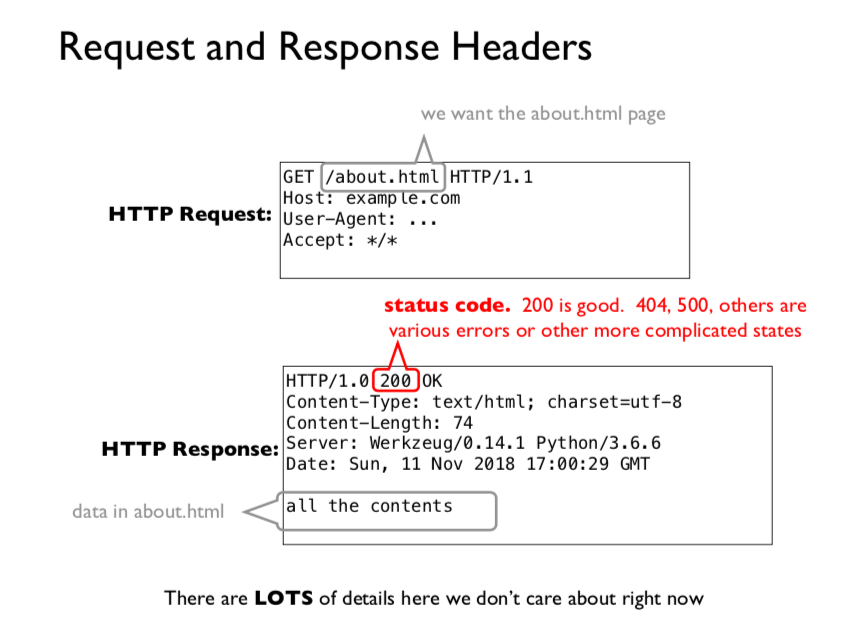

## HTTP Status Codes overview
- 1XX : Informational
- 2XX : Successful
- 3XX : Redirection
- 4XX : Client Error
- 5XX : Server Error

https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

In [1]:
import requests
import json
from pandas import DataFrame

## requests.get : Simple string example
- URL: https://www.msyamkumar.com/hello.txt

In [2]:
url = "https://www.msyamkumar.com/hello.txt"
r = requests.get(url) # r is the response
print(r.status_code)
print(r.text)

200
Hello CS220 / CS319 students! Welcome to my website. Hope you are staying safe and healthy!



In [3]:
# Q: What if the web site does not exist?
typo_url = "https://www.msyamkumar.com/hello.txttttt"
r = requests.get(typo_url)
print(r.status_code)
print(r.text)

# A: We get text but the text is not from the client

404
<?xml version="1.0" encoding="UTF-8"?>
<Error><Code>NoSuchKey</Code><Message>The specified key does not exist.</Message><Key>meena/hello.txttttt</Key><RequestId>ASYGDJSJPE7WA7ND</RequestId><HostId>mgWC/aW0d6+sc723ufxsRf62618SMeQpUK+u/mpgjKUBPqW+Q1ROa0RQStcl6xQl8RmUMOuUmPE=</HostId></Error>


In [4]:
# We can check for a status_code error by using an assert
typo_url = "https://www.msyamkumar.com/hello.txttttt"
r = requests.get(typo_url)
assert r.status_code == 200
print(r.status_code)
print(r.text)


AssertionError: 

In [5]:
# instead of using an assert, we often use raise_for_status()
r = requests.get(typo_url)
r.raise_for_status() #similar to asserting r.status_code == 200
r.text

# Note the error you get....we will use this in the next cell

HTTPError: 404 Client Error: Not Found for url: https://www.msyamkumar.com/hello.txttttt

In [6]:
#Let's try to catch that error

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except HTTPError as e:
    print("oops!!", e)
    

NameError: name 'HTTPError' is not defined

In [7]:
# we often need to pre-pend the names of exceptions with the name of the module
# fix the error from above

try:
    r = requests.get(typo_url)
    r.raise_for_status() #similar to asserting r.status_code == 200
    r.text
except requests.HTTPError as e:
    print("oops!!", e)
    


oops!! 404 Client Error: Not Found for url: https://www.msyamkumar.com/hello.txttttt


## requests.get : JSON file example
- URL: https://www.msyamkumar.com/scores.json
- `json.load` (FILE_OBJECT)
- `json.loads` (STRING)

In [8]:
# GETting a JSON file, the long way
url = "https://www.msyamkumar.com/scores.json"
r = requests.get(url)
r.raise_for_status()
urltext = r.text
print(urltext)
d = json.loads(urltext)
print(type(d), d)

{
  "alice": 100,
  "bob": 200,
  "cindy": 300
}

<class 'dict'> {'alice': 100, 'bob': 200, 'cindy': 300}


In [9]:
# GETting a JSON file, the shortcut way
url = "https://www.msyamkumar.com/scores.json"
#Shortcut to bypass using json.loads()
r = requests.get(url)
r.raise_for_status()
d2 = r.json()
print(type(d2), d2)

<class 'dict'> {'alice': 100, 'bob': 200, 'cindy': 300}


## Good GET Etiquette

Don't make a lot of requests to the same server all at once.
 - Requests use up the server's time
 - Major websites will often ban users who make too many requests
 - You can break a server....similar to DDoS attacks (DON'T DO THIS)
 
In CS220 we will usually give you a link to a copied file to avoid overloading the site.


## DEMO 1: reddit json processing
- DON'T USE THIS: https: // www.red dit.com / r / UWMadison.json - 
- INSTEAD USE THIS:
https://www.msyamkumar.com/cs220/f21/materials/lectureDemo_code/lec-31/examples/UWMadison.json

THE FIRST LINK IS TO A LIVE WEBPAGE - Review requests etiquette before running!

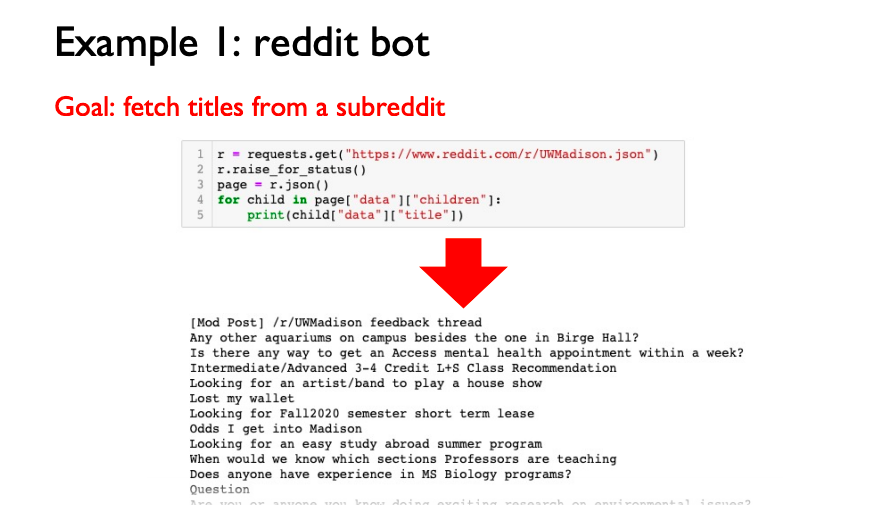

In [10]:
url = "https://www.msyamkumar.com/cs220/f21/materials/lectureDemo_code/lec-31/examples/UWMadison.json"
r = requests.get(url)
r.raise_for_status()
d = r.json()
print(type(d))


<class 'dict'>


### How to explore an unknown JSON?
- If you run into a dict, try .keys() functions to look at the keys of the dictionary
- If you run into a list, iterate over the list and print each item

In [15]:
print(d.keys())
print(type(d['data']))
print(d['data'].keys())
print(type(d['data']['children']))
print(len(d['data']['children']))

dict_keys(['kind', 'data'])
<class 'dict'>
dict_keys(['after', 'dist', 'modhash', 'geo_filter', 'children', 'before'])
<class 'list'>
26


In [16]:
for item in d['data']['children']:
    print(type(item))
len(d)

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>


2

In [17]:
# write a for loop to iterate over the children
for item in d["data"]["children"]:
    print(item["data"]["score"], item["data"]["title"])


265 A Relatively Comprehensive Guide to UW Football Games and Traditions
112 Planning a 1 month anniversary of CS577 midterm not being graded
4 CS classes already full?
71 NO, MATH 234 IS NOT CURVED
5 Social Work 206 with Curtis
3 Recommendations for an easy 3 credit literature course?
6 TIFU Help
9 Adderall: The epidemic that no one is talking about
5 Was the Calc 3 midterm harder than expected or just me?
4 Physics 202 - Midterm 2
3 What Python/data science course should I add on?
2 Missing keys in Engineering Building or Union South
3 ZOOLOGY 655- Modeling Neurodevelopmental disease
250 Worst day of my life.
2 CNSR SCI 321
2 AH Sp 2022 Course Highlight: Prof. Spaulding, AH 408:“Global Modernism,” T/TR 11am–12:15pm. What does 20thc. modernism look like from a global perspective? Is it possible to speak of a singular modernism at all, as opposed to a multiplicity of diverse modernisms, each responsive to local conditions?
2 Math 222 Professors
2 See-through red water bottle LOST
1 Wha

## DEMO 2: State populations
prefix_URL = "https://www.msyamkumar.com/cs220/f21/materials/lectureDemo_code/lec-31/examples/data/"

Each line in state_files.txt contains the name of a .json file (in the same directory on the server). Using `get` requests, load the contents of all of the json files and make one combined DataFrame with all of them. You will probably need to explore the data!

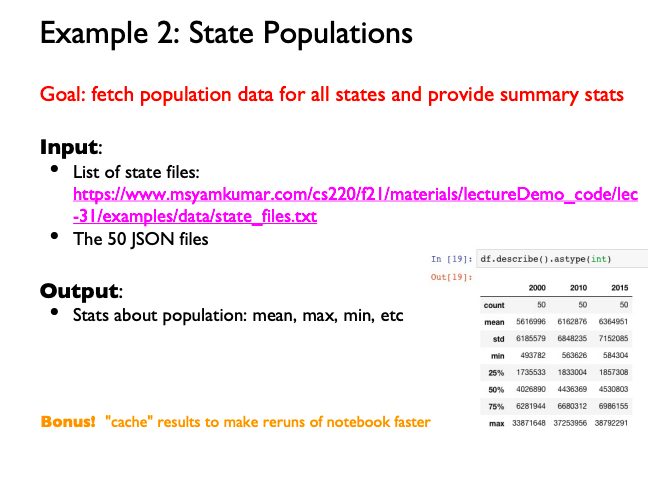

In [26]:
prefix_URL = "https://www.msyamkumar.com/cs220/f21/materials/lectureDemo_code/lec-31/examples/data/"
r = requests.get(prefix_URL + "state_files.txt")
r.raise_for_status()
#print(r.text)
# get a list of all files

# put into a list
file_names = r.text.split("\n")
#print(file_names)

# make a list of lists, each row is one list
all_state_info = []

# iterate through all file_names
for state in file_names:
    state_url = prefix_URL + state
    #print(state_url)

    # get the request, store in a dict
    r = requests.get(state_url)
    r.raise_for_status()
    state_dict = r.json()
    #print(state, state_dict)
    state_dict["Name"] = state[:-5]  # add this in later
    all_state_info.append(state_dict)
    
    
all_state_info[:5]

[{'2000': 4447100, '2010': 4779736, '2015': 4846411, 'Name': 'Alabama'},
 {'2000': 626932, '2010': 710231, '2015': 737046, 'Name': 'Alaska'},
 {'2000': 5130632, '2010': 6392017, '2015': 6728783, 'Name': 'Arizona'},
 {'2000': 2673400, '2010': 2915918, '2015': 2966835, 'Name': 'Arkansas'},
 {'2000': 33871648, '2010': 37253956, '2015': 38792291, 'Name': 'California'}]

### Make it into a DataFrame, and add a Column

In [28]:
# you can make a DataFrame from a list of dicts
state_df = DataFrame(all_state_info)
state_df

# set the index to be Name
state_df = state_df.set_index("Name")
state_df

,2000,2010,2015
Name,,,
Alabama,4447100,4779736,4846411
Alaska,626932,710231,737046
Arizona,5130632,6392017,6728783
Arkansas,2673400,2915918,2966835
California,33871648,37253956,38792291
Colorado,4301261,5029196,5355588
Connecticut,3405565,3574097,3594762
Delaware,783600,897934,935968
Florida,15982378,18801310,19905569


### Write it out to a JSON file on your drive
### You now have your own copy!

In [29]:
# bonus....  Write it all out to a single JSON file
# use the code from the previous lecture to write a DF to a csv
# but in this case we WANT the index part of our CSV
#state_df.to_csv("state_populations.csv", index = False) # not this way, 
state_df.to_csv("state_populations.csv") # this way...include the index in the CSV